Using Student Performance dataset from UCI

In [4]:
df <- read.csv("student-mat.csv", sep=";")

In [5]:
head(df)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15


In [6]:
tail(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0
391,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
392,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
393,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
394,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
395,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [8]:
any(is.na(df))

[1] FALSE

False means clean dataset

In [9]:
summary(df)


 school   sex          age       address famsize   Pstatus      Medu      
 GP:349   F:208   Min.   :15.0   R: 88   GT3:281   A: 41   Min.   :0.000  
 MS: 46   M:187   1st Qu.:16.0   U:307   LE3:114   T:354   1st Qu.:2.000  
                  Median :17.0                             Median :3.000  
                  Mean   :16.7                             Mean   :2.749  
                  3rd Qu.:18.0                             3rd Qu.:4.000  
                  Max.   :22.0                             Max.   :4.000  
      Fedu             Mjob           Fjob            reason      guardian  
 Min.   :0.000   at_home : 59   at_home : 20   course    :145   father: 90  
 1st Qu.:2.000   health  : 34   health  : 18   home      :109   mother:273  
 Median :2.000   other   :141   other   :217   other     : 36   other : 32  
 Mean   :2.522   services:103   services:111   reputation:105               
 3rd Qu.:3.000   teacher : 58   teacher : 29                                
 Max.   :4.00

In [10]:
str(df)


'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [18]:
library(ggplot2)
library(dplyr)
library(ggthemes)

In [15]:
# Grab only numeric columns
num.cols <- sapply(df, is.numeric)

# Filter to numeric columns for correlation
cor.data <- cor(df[,num.cols])

cor.data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000000,-0.163658419,-0.163438069,0.070640721,-0.004140037,0.24366538,0.053940096,0.01643439,0.126963880,0.131124605,0.11727605,-0.062187369,0.17523008,-0.06408150,-0.14347405,-0.16157944
Medu,-0.163658419,1.000000000,0.623455112,-0.171639305,0.064944137,-0.23667996,-0.003914458,0.03089087,0.064094438,0.019834099,-0.04712346,-0.046877829,0.10028482,0.20534100,0.21552717,0.21714750
Fedu,-0.163438069,0.623455112,1.000000000,-0.158194054,-0.009174639,-0.25040844,-0.001369727,-0.01284553,0.043104668,0.002386429,-0.01263102,0.014741537,0.02447289,0.19026994,0.16489339,0.15245694
traveltime,0.070640721,-0.171639305,-0.158194054,1.000000000,-0.100909119,0.09223875,-0.016807986,-0.01702494,0.028539674,0.138325309,0.13411575,0.007500606,-0.01294378,-0.09303999,-0.15319796,-0.11714205
studytime,-0.004140037,0.064944137,-0.009174639,-0.100909119,1.000000000,-0.17356303,0.039730704,-0.14319841,-0.063903675,-0.196019263,-0.25378473,-0.075615863,-0.06270018,0.16061192,0.13588000,0.09781969
failures,0.243665377,-0.236679963,-0.250408444,0.092238746,-0.173563031,1.00000000,-0.044336626,0.09198747,0.124560922,0.136046931,0.14196203,0.065827282,0.06372583,-0.35471761,-0.35589563,-0.36041494
famrel,0.053940096,-0.003914458,-0.001369727,-0.016807986,0.039730704,-0.04433663,1.000000000,0.15070144,0.064568411,-0.077594357,-0.11339731,0.094055728,-0.04435409,0.02216832,-0.01828135,0.05136343
freetime,0.016434389,0.030890867,-0.012845528,-0.017024944,-0.143198407,0.09198747,0.150701444,1.00000000,0.285018715,0.209000848,0.14782181,0.075733357,-0.05807792,0.01261293,-0.01377714,0.01130724
goout,0.126963880,0.064094438,0.043104668,0.028539674,-0.063903675,0.12456092,0.064568411,0.28501871,1.000000000,0.266993848,0.42038575,-0.009577254,0.04430222,-0.14910397,-0.16225003,-0.13279147
Dalc,0.131124605,0.019834099,0.002386429,0.138325309,-0.196019263,0.13604693,-0.077594357,0.20900085,0.266993848,1.000000000,0.64754423,0.077179582,0.11190803,-0.09415879,-0.06412018,-0.05466004


In [21]:
library(corrplot)
library(corrgram)

corrplot 0.84 loaded


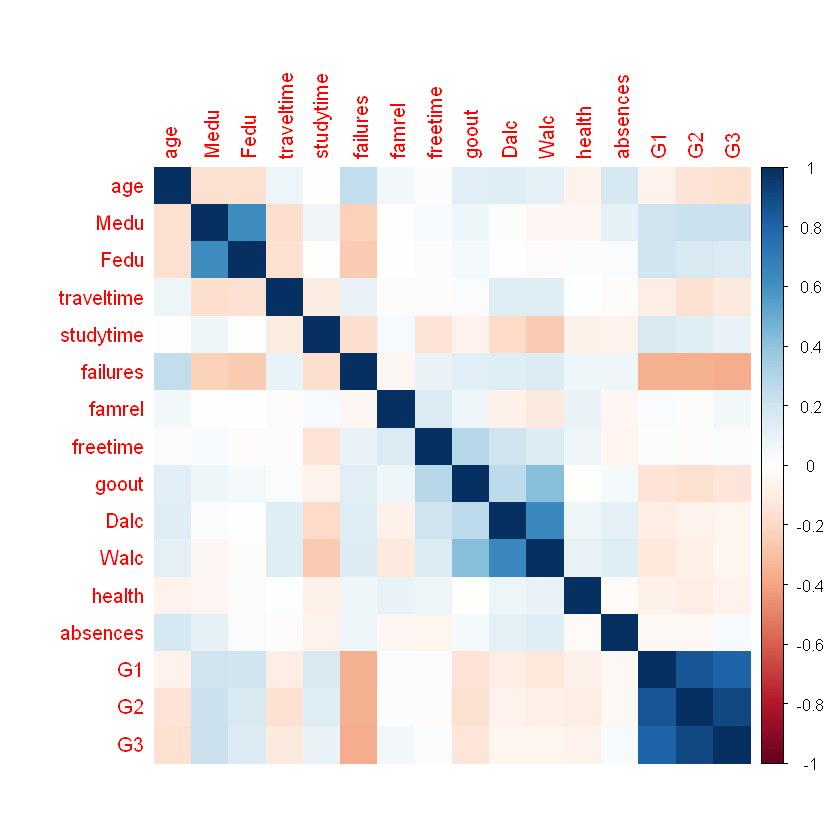

In [22]:
corrplot(cor.data,method='color')



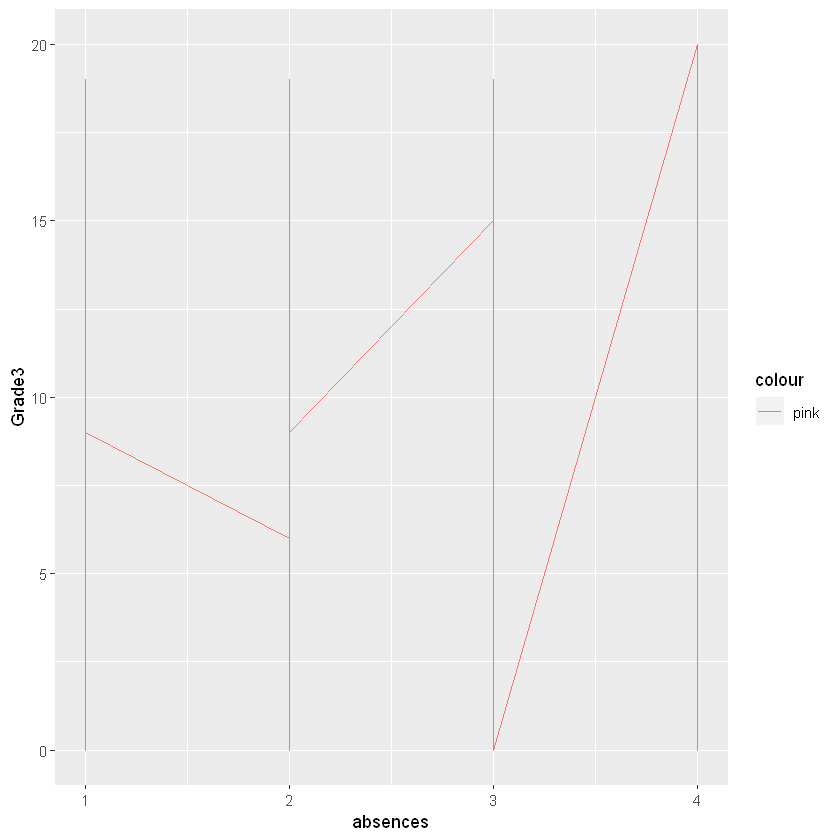

In [58]:
 qplot(df$G2, df$G3, data=df, color="pink",geom=c("line"), xlab="absences", ylab="Grade3") 

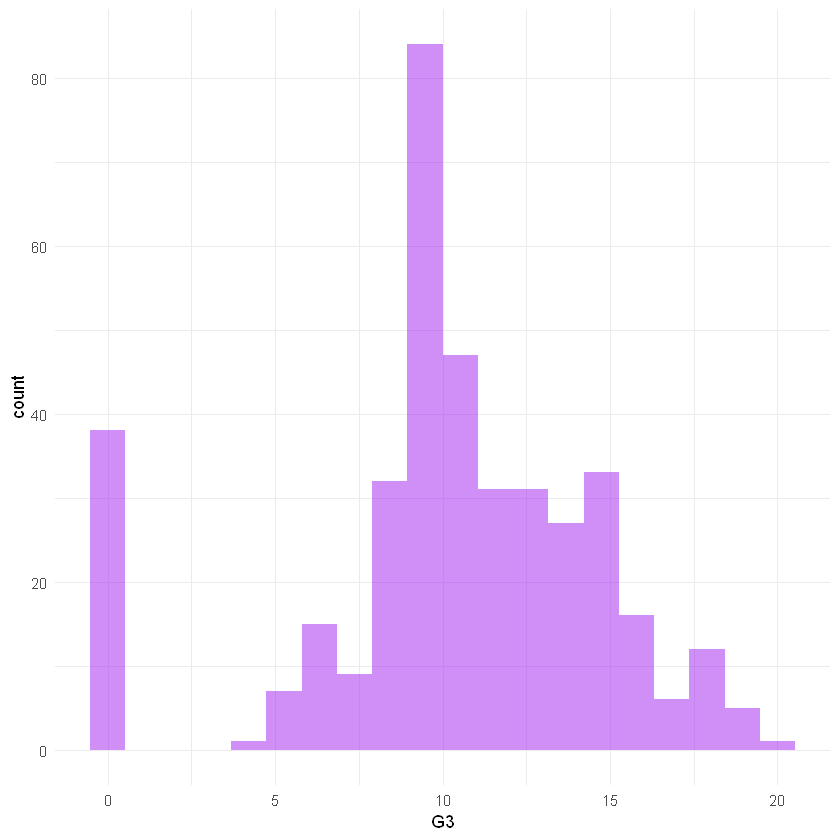

In [26]:
ggplot(df,aes(x=G3)) + geom_histogram(bins=20,alpha=0.5,fill='purple') + theme_minimal()


In [32]:
# Import Library
library(caTools)
# Set a random see so your "random" results are the same as this notebook
set.seed(101) 

# Split up the sample, basically randomly assigns a booleans to a new column "sample"
sample <- sample.split(df$age, SplitRatio = 0.70) # SplitRatio = percent of sample==TRUE

# Training Data
train = subset(df, sample == TRUE)

# Testing Data
test = subset(df, sample == FALSE)

In [34]:
model <- lm(G3 ~ .,train)

In [35]:
summary(model)


Call:
lm(formula = G3 ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7681 -0.6423  0.2294  1.0691  4.5942 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.329568   2.474569  -0.537 0.591574    
schoolMS          0.838581   0.470545   1.782 0.076016 .  
sexM              0.034883   0.275586   0.127 0.899382    
age              -0.214994   0.119579  -1.798 0.073472 .  
addressU          0.067190   0.326035   0.206 0.836905    
famsizeLE3       -0.111068   0.283228  -0.392 0.695302    
PstatusT         -0.153653   0.401679  -0.383 0.702417    
Medu              0.279949   0.171111   1.636 0.103164    
Fedu             -0.221275   0.151103  -1.464 0.144422    
Mjobhealth        0.002065   0.610532   0.003 0.997304    
Mjobother         0.509947   0.403195   1.265 0.207209    
Mjobservices      0.475476   0.435332   1.092 0.275857    
Mjobteacher       0.285345   0.550640   0.518 0.604802    
Fjobhealth        0.433

In [37]:
# Grab residuals
res <- residuals(model)

# Convert to DataFrame for gglpot
res <- as.data.frame(res)

head(res)

,res
1,0.9678451
5,1.1829980
6,-1.4096050
7,0.1125706
9,0.3814670
10,0.3221204


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


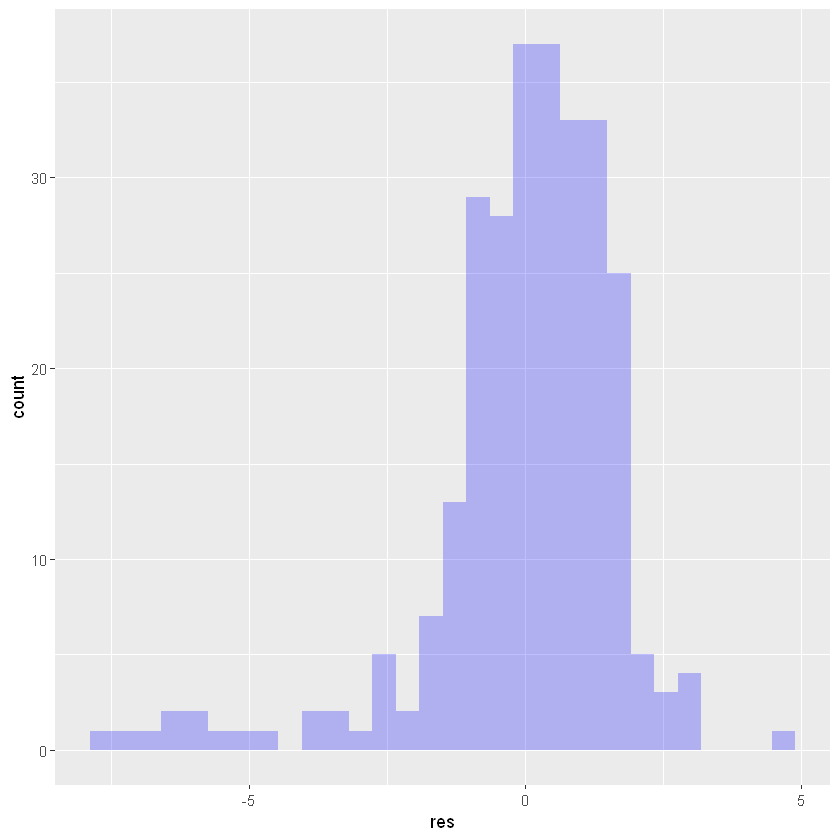

In [39]:
ggplot(res,aes(res)) +  geom_histogram(fill='blue',alpha=0.25)


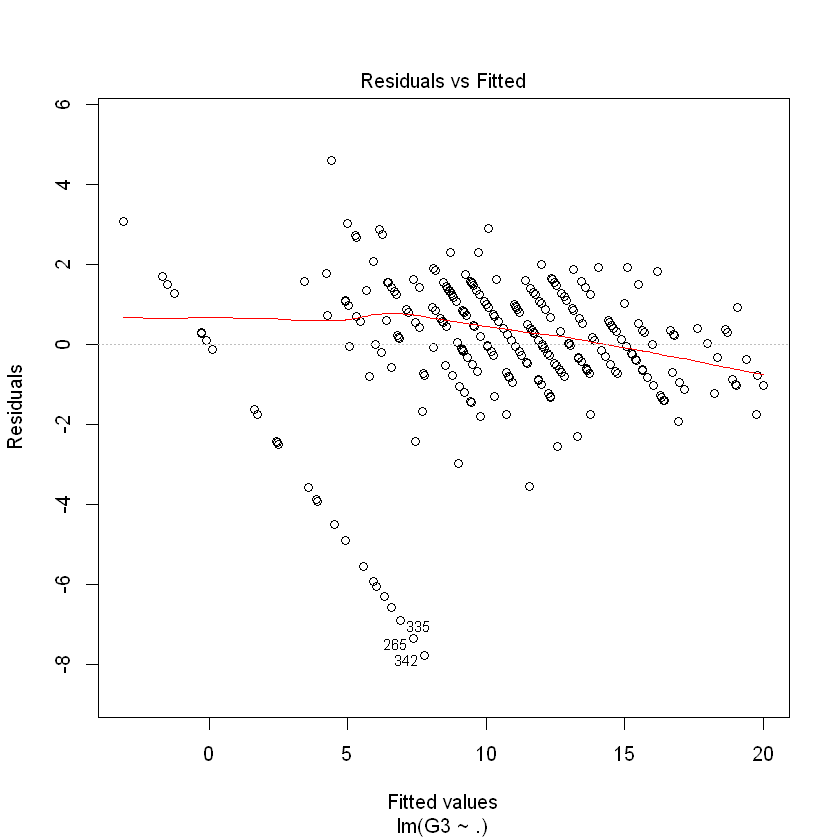

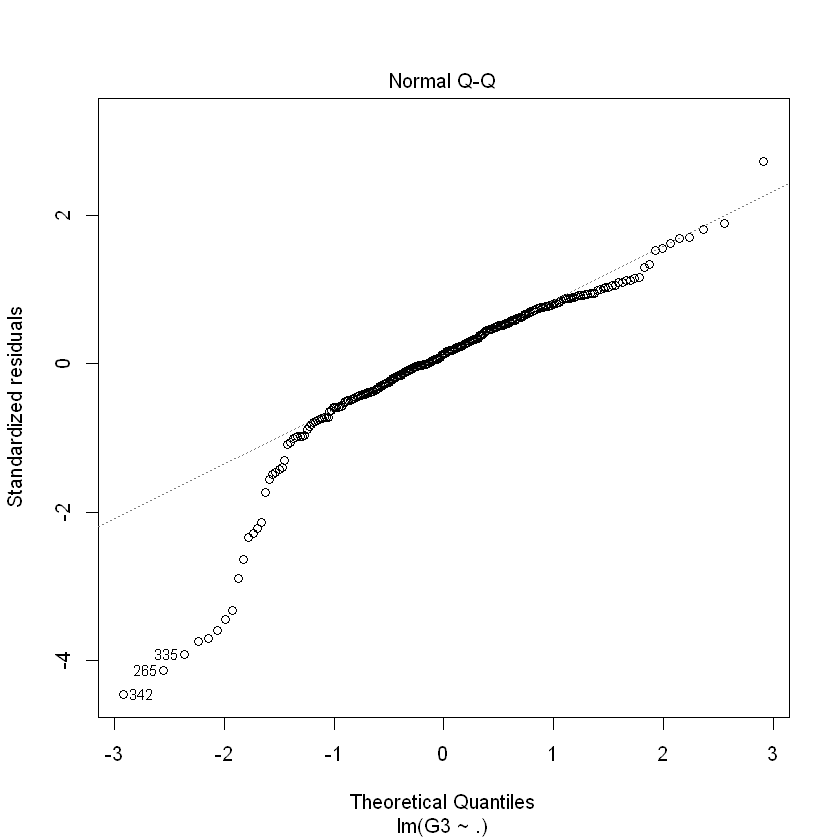

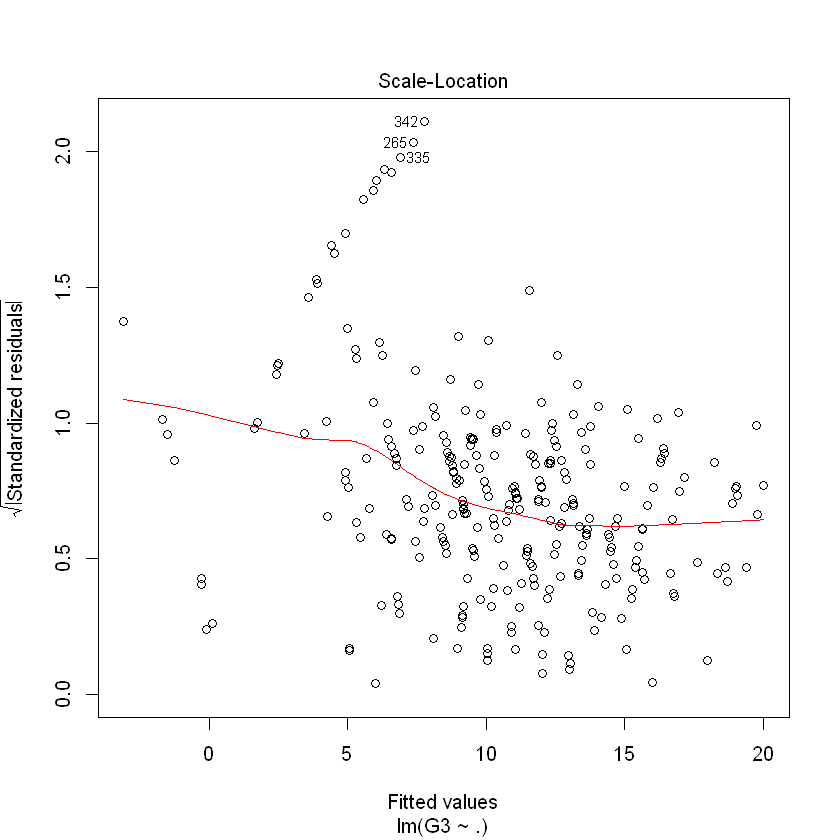

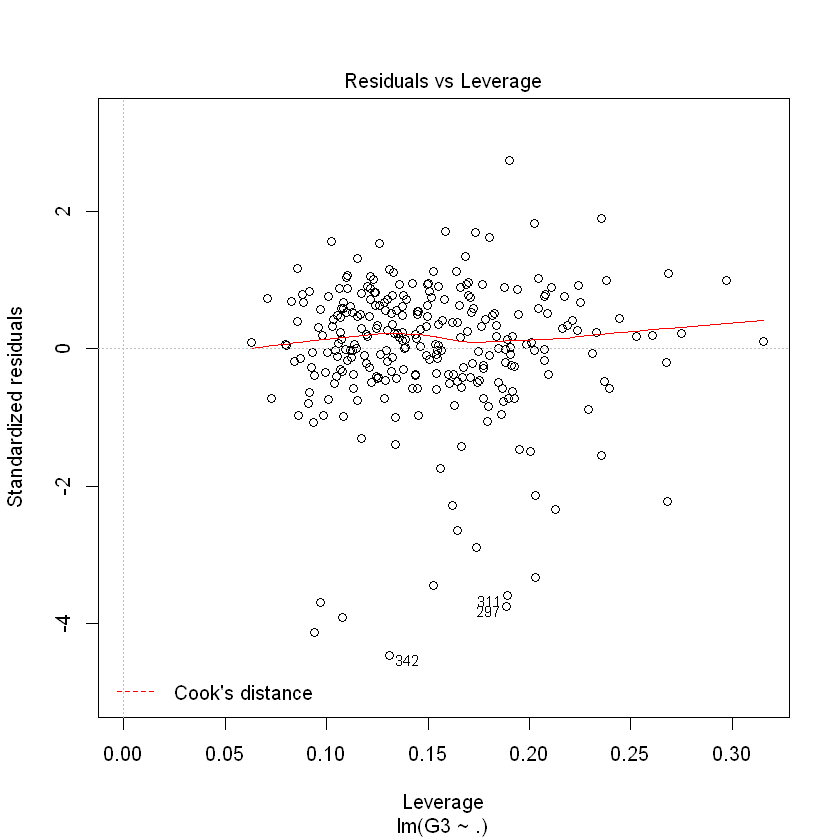

In [40]:
plot(model)


In [41]:
G3.predictions <- predict(model,test)


In [42]:
results <- cbind(G3.predictions,test$G3) 
colnames(results) <- c('pred','real')
results <- as.data.frame(results)

In [49]:
sample(results)

,pred,real
2,3.835533,6
3,7.148456,10
4,13.257794,15
8,5.088100,6
15,14.934291,16
16,13.835679,14
20,8.312217,10
23,15.084120,16
29,11.186269,11
31,10.740249,12


In [43]:
to_zero <- function(x){
    if  (x < 0){
        return(0)
    }else{
        return(x)
    }
}

In [45]:
results$pred <- sapply(results$pred,to_zero)

In [50]:
mse <- mean((results$real-results$pred)^2)
print(mse)

[1] 4.411405


In [51]:
mse^0.5


[1] 2.100335